In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import random
import seaborn as sns

sns.set_theme()

In [2]:
df=pd.read_csv("df_final.csv")
df=df.drop(df.columns[0], axis=1)

In [54]:
df

,username,review,star_rating,num_star_rating
0,Fergus,people desire good says aristotle yes everythi...,it was amazing,5.0
1,Ahmad Sharabiani,πολιτικά politics aristotlearistotle politics ...,really liked it,4.0
2,Tim,personally find tough sort review classics eve...,it was amazing,5.0
3,Erick,despite warnings protests received goodreads f...,really liked it,4.0
4,J,quite turn away optimistic figure tone nicomac...,it was ok,2.0
...,...,...,...,...
295,James Lang,well feels little strange give three stars ari...,liked it,3.0
296,Milena M,aristotle represents fundamental ideas politic...,really liked it,4.0
297,Cami,relevant information book think since book rea...,really liked it,4.0
298,K,contains aristotle ideas governments work best...,did not like it,1.0


# Carry out sentiment classification on reviews

In [3]:
vader=SentimentIntensityAnalyzer()
sentiment=[]

> This is the old solution that doesn't work anymore. If we append the sentiment score to a list, we can change the  dictionary to a dataframe

In [4]:
sentiment=[]
for review in df['review']:
    sentiment_score=vader.polarity_scores(str(review))
    sentiment.append(sentiment_score)

> New solution

In [5]:
sentiment=pd.json_normalize(df['review'].apply(lambda review:vader.polarity_scores(str(review))))

In [6]:
df=pd.concat([df,sentiment],axis=1)

In [7]:
df

,username,review,star_rating,num_star_rating,neg,neu,pos,compound
0,Fergus,people desire good says aristotle yes everythi...,it was amazing,5.0,0.122,0.565,0.313,0.9972
1,Ahmad Sharabiani,πολιτικά politics aristotlearistotle politics ...,really liked it,4.0,0.000,0.931,0.069,0.9917
2,Tim,personally find tough sort review classics eve...,it was amazing,5.0,0.061,0.688,0.251,0.9979
3,Erick,despite warnings protests received goodreads f...,really liked it,4.0,0.096,0.696,0.208,0.9994
4,J,quite turn away optimistic figure tone nicomac...,it was ok,2.0,0.286,0.595,0.120,-0.9750
...,...,...,...,...,...,...,...,...
295,James Lang,well feels little strange give three stars ari...,liked it,3.0,0.089,0.681,0.230,0.7841
296,Milena M,aristotle represents fundamental ideas politic...,really liked it,4.0,0.000,0.714,0.286,0.9627
297,Cami,relevant information book think since book rea...,really liked it,4.0,0.000,0.674,0.326,0.9259
298,K,contains aristotle ideas governments work best...,did not like it,1.0,0.107,0.607,0.286,0.9173


###### Classifying reviews

In [8]:
df['sentiment']=df['compound'].apply(lambda x: 'positive' if x>0.05 else ('neutral' if -0.05<x<0.05 else 'negative'))

In [9]:
df

,username,review,star_rating,num_star_rating,neg,neu,pos,compound,sentiment
0,Fergus,people desire good says aristotle yes everythi...,it was amazing,5.0,0.122,0.565,0.313,0.9972,positive
1,Ahmad Sharabiani,πολιτικά politics aristotlearistotle politics ...,really liked it,4.0,0.000,0.931,0.069,0.9917,positive
2,Tim,personally find tough sort review classics eve...,it was amazing,5.0,0.061,0.688,0.251,0.9979,positive
3,Erick,despite warnings protests received goodreads f...,really liked it,4.0,0.096,0.696,0.208,0.9994,positive
4,J,quite turn away optimistic figure tone nicomac...,it was ok,2.0,0.286,0.595,0.120,-0.9750,negative
...,...,...,...,...,...,...,...,...,...
295,James Lang,well feels little strange give three stars ari...,liked it,3.0,0.089,0.681,0.230,0.7841,positive
296,Milena M,aristotle represents fundamental ideas politic...,really liked it,4.0,0.000,0.714,0.286,0.9627,positive
297,Cami,relevant information book think since book rea...,really liked it,4.0,0.000,0.674,0.326,0.9259,positive
298,K,contains aristotle ideas governments work best...,did not like it,1.0,0.107,0.607,0.286,0.9173,positive


# Exploratory and sentiment analysis

********************************************************************************************************************************************

## What is the general sentiment towards this book?


In [13]:
sentiment_count=df['sentiment'].value_counts()

In [57]:
star_review_count=df['star_rating'].value_counts()

In [73]:
num_star_rating_count=df['num_star_rating'].value_counts()

<BarContainer object of 5 artists>

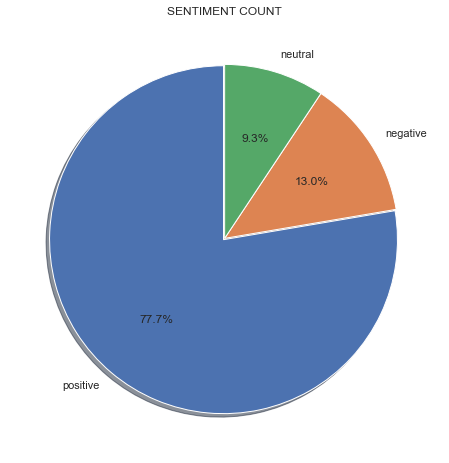

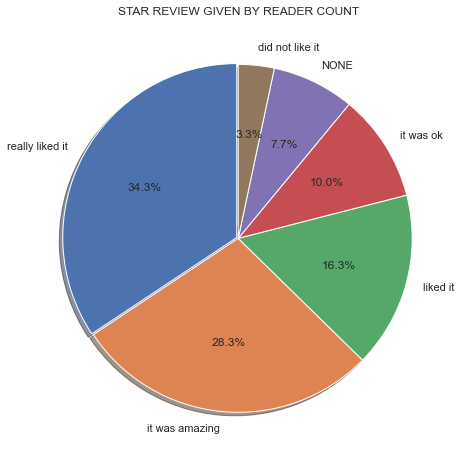

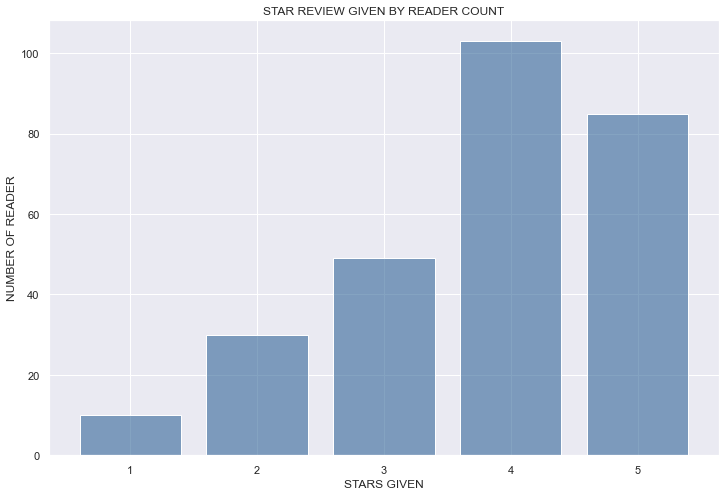

In [81]:
explode = (0.01, 0, 0)

fig,ax=plt.subplots(figsize=(12,8))
plt.title('SENTIMENT COUNT')
ax.pie(sentiment_count,labels=sentiment_count.index,autopct='%1.1f%%',shadow=True,startangle=90,explode=explode)

explode = (0.01, 0, 0,0,0,0)

fig,ax=plt.subplots(figsize=(12,8))
plt.title('STAR REVIEW GIVEN BY READER COUNT')
ax.pie(star_review_count,labels=star_review_count.index,autopct='%1.1f%%',shadow=True,startangle=90,explode=explode)



explode = (0.01, 0, 0,0,0)

fig,ax=plt.subplots(figsize=(12,8))
plt.title('STAR REVIEW GIVEN BY READER COUNT')
plt.ylabel('NUMBER OF READER')
plt.xlabel('STARS GIVEN')
ax.bar(height=num_star_rating_count,x=num_star_rating_count.index,color=(0.2, 0.4, 0.6, 0.6))

> **We can say that readers generally have a positive views towards Aristotle work and a lot of reviewers have a positive feedback about the book. This is very important since Politics by Aristotle is considered as one of the foundation of political philosophy that established the current political world these days.**

## What are main points that are being put forward for each class of sentiment?

In [82]:
postive_reviews=df[df['sentiment']=='positive']
negative_reviews=df[df['sentiment']=='negative']
neutral_reviews=df[df['sentiment']=='neutral']

In [97]:
colour=['green','yellow','red']

labels=['Positive reviews','Negative reviews','Neutral reviews']

def words_frequency(dataframe):
    word_frequency=pd.Series(dataframe['review']).str.split(expand=True).stack().value_counts()
    word_frequency
   
    
    plt.figure(figsize=(12,8))
    word_frequency[:40].plot(kind='barh',color=random.choice(colour))
    plt.xlabel('Word frequency')
    plt.ylabel('Words')
    
    temp_review=''.join(dataframe['review'])
    
    plt.figure(figsize=(12,6))
    wordcloud=WordCloud(background_color='lightblue').generate(temp_review)
    plt.imshow(wordcloud,interpolation='bilinear')

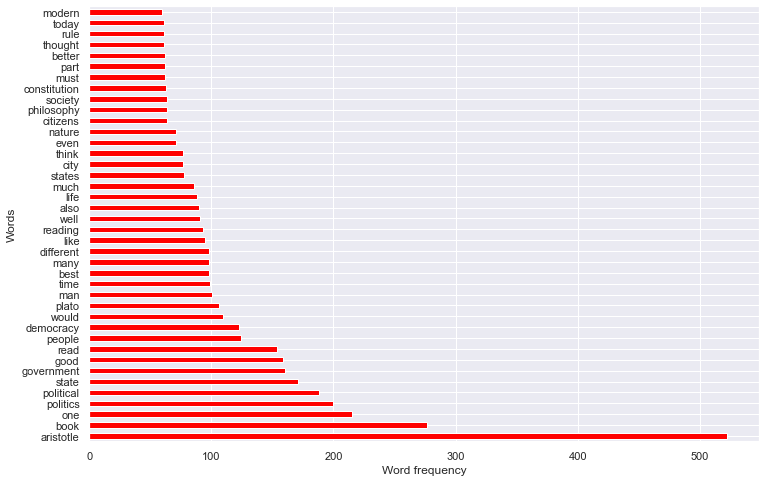

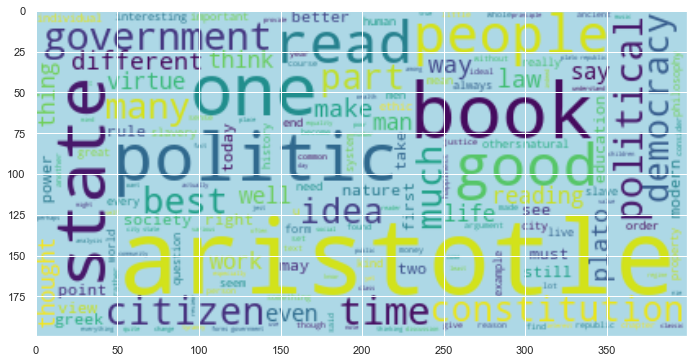

In [98]:
words_frequency(postive_reviews)